### PCA (Principal Component Analysis - Visualization)

PCA can be used for visualization of data.

In [21]:
# PCA Visualization (4-D --> 2-D)

import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# Standardizing the data to have mean as 0 and variance 1.

from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# descriptive features
x = df.loc[:, features].values
# target feature
y = df.loc[:,['species']].values

x = StandardScaler().fit_transform(x)
print(x[0]) # example row

[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]


In [27]:
# Converting 4-D data to 2-D data

# The original data has 4 dimensions. The resulting data will have only 2 dimensions. 
# No specific information is attached to 2 resulting components.

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Add the target column
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


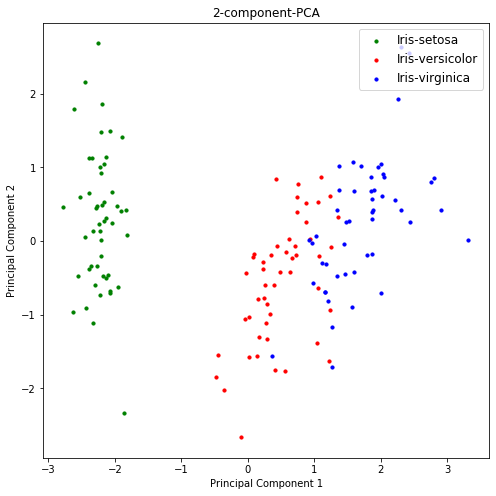

In [28]:
# Visualizing/Plotting 2D Data

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

plt.scatter(finalDf.loc[finalDf['species'] == 'setosa', 'principal component 1'], 
            finalDf.loc[finalDf['species'] == 'setosa', 'principal component 2'], color = "green", s = 10,  
            label = 'Iris-setosa')
plt.scatter(finalDf.loc[finalDf['species'] == 'versicolor', 'principal component 1'], 
            finalDf.loc[finalDf['species'] == 'versicolor', 'principal component 2'], color = "red", s = 10,  
            label = 'Iris-versicolor')
plt.scatter(finalDf.loc[finalDf['species'] == 'virginica', 'principal component 1'], 
            finalDf.loc[finalDf['species'] == 'virginica', 'principal component 2'], color = "blue", s = 10,  
            label = 'Iris-virginica')

plt.title("2-component-PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend = plt.legend(loc='upper right', fontsize='large')
plt.show()

In [29]:
# Explained Variance Ratio

# Tells you how much information (variance) can be attributed to each of the principal components. 
# Since a 4 dimensional space is converted to 2 dimensional space, some information is lost.

pca.explained_variance_ratio_

# Explanation: 1st principal component contains 72.9% of information and 2nd one contains 22.8%.

array([0.72962445, 0.22850762])